## MeanReversion (RSI+BB)
> By Srishti Singh


In [2]:
#importing libraries
import yfinance as yfin
import pandas as pd
import numpy as np
import ta
import matplotlib.pyplot as plt

In [21]:
class MeanReversion:
    
    def __init__(self, df):
        self.df = df
        self.df = pd.read_csv(df)
        if self.df.empty:
            print('Please enter a valid path')
        else:
            self.rsi_bb()
            self.generate_signals()
            self.filter()
            self.profit()
            self.visualise()
            self.cumulative_profit()
            
    def rsi_bb(self):
        self.df['bol_middle'] = ((self.df.close + self.df.high + self.df.low)/3).rolling(20).mean()
        self.df['stddev'] = ((self.df.close + self.df.high + self.df.low)/3).rolling(20).std()
        self.df['bol_upper'] = self.df.bol_middle + (2 * self.df.stddev)
        self.df['bol_lower'] = self.df.bol_middle - (2 * self.df.stddev)
        self.df['rsi'] = ta.momentum.rsi(self.df.close, window = 14)
        self.df.dropna(inplace = True)
    
    #function for generating signals
    def generate_signals(self):
        conditions = [(self.df.rsi < 30) & (self.df.close < self.df.bol_lower), 
                      (self.df.rsi > 70) & (self.df.close > self.df.bol_upper)]
        choices = ['Buy', 'Sell']
        self.df['signal'] = np.select(conditions, choices)
        self.df.signal = self.df.signal.shift()
        self.df.dropna(inplace = True)
    
    #function for filtering and recording dates and prices

    def filter(self):
        position = False
        buydates, selldates = [], []
        for index, row in self.df.iterrows():
            if not position and row['signal'] == 'Buy':
                position = True
                buydates.append(index)
            
            if position and row['signal'] == 'Sell':
                position = False
                selldates.append(index)

            self.buy_arr = self.df.loc[buydates].open
            self.sell_arr = self.df.loc[selldates].open

    def profit(self):
        if self.buy_arr.index[-1] > self.sell_arr.index[-1]:
            self.buy_arr = self.buy_arr[:-1]
        return (self.sell_arr.values - self.buy_arr.values)/(self.buy_arr.values)
    
    def cumulative_profit(self):
        if self.buy_arr.index[-1] > self.sell_arr.index[-1]:
            self.buy_arr = self.buy_arr[:-1]
        self.prf = (self.sell_arr.values - self.buy_arr.values)/(self.buy_arr.values)
        return (self.prf + 1).prod() - 1
    
    def visualise(self):
        plt.figure(figsize=(30, 20))
        plt.plot(self.df.close, label = 'Price')
        plt.scatter(self.sell_arr.index, self.sell_arr.values, label = 'Sell', marker='v', color = 'red')
        plt.scatter(self.buy_arr.index, self.buy_arr.values, label = 'Buy', marker='^', color = 'green')


-0.8638506577878855

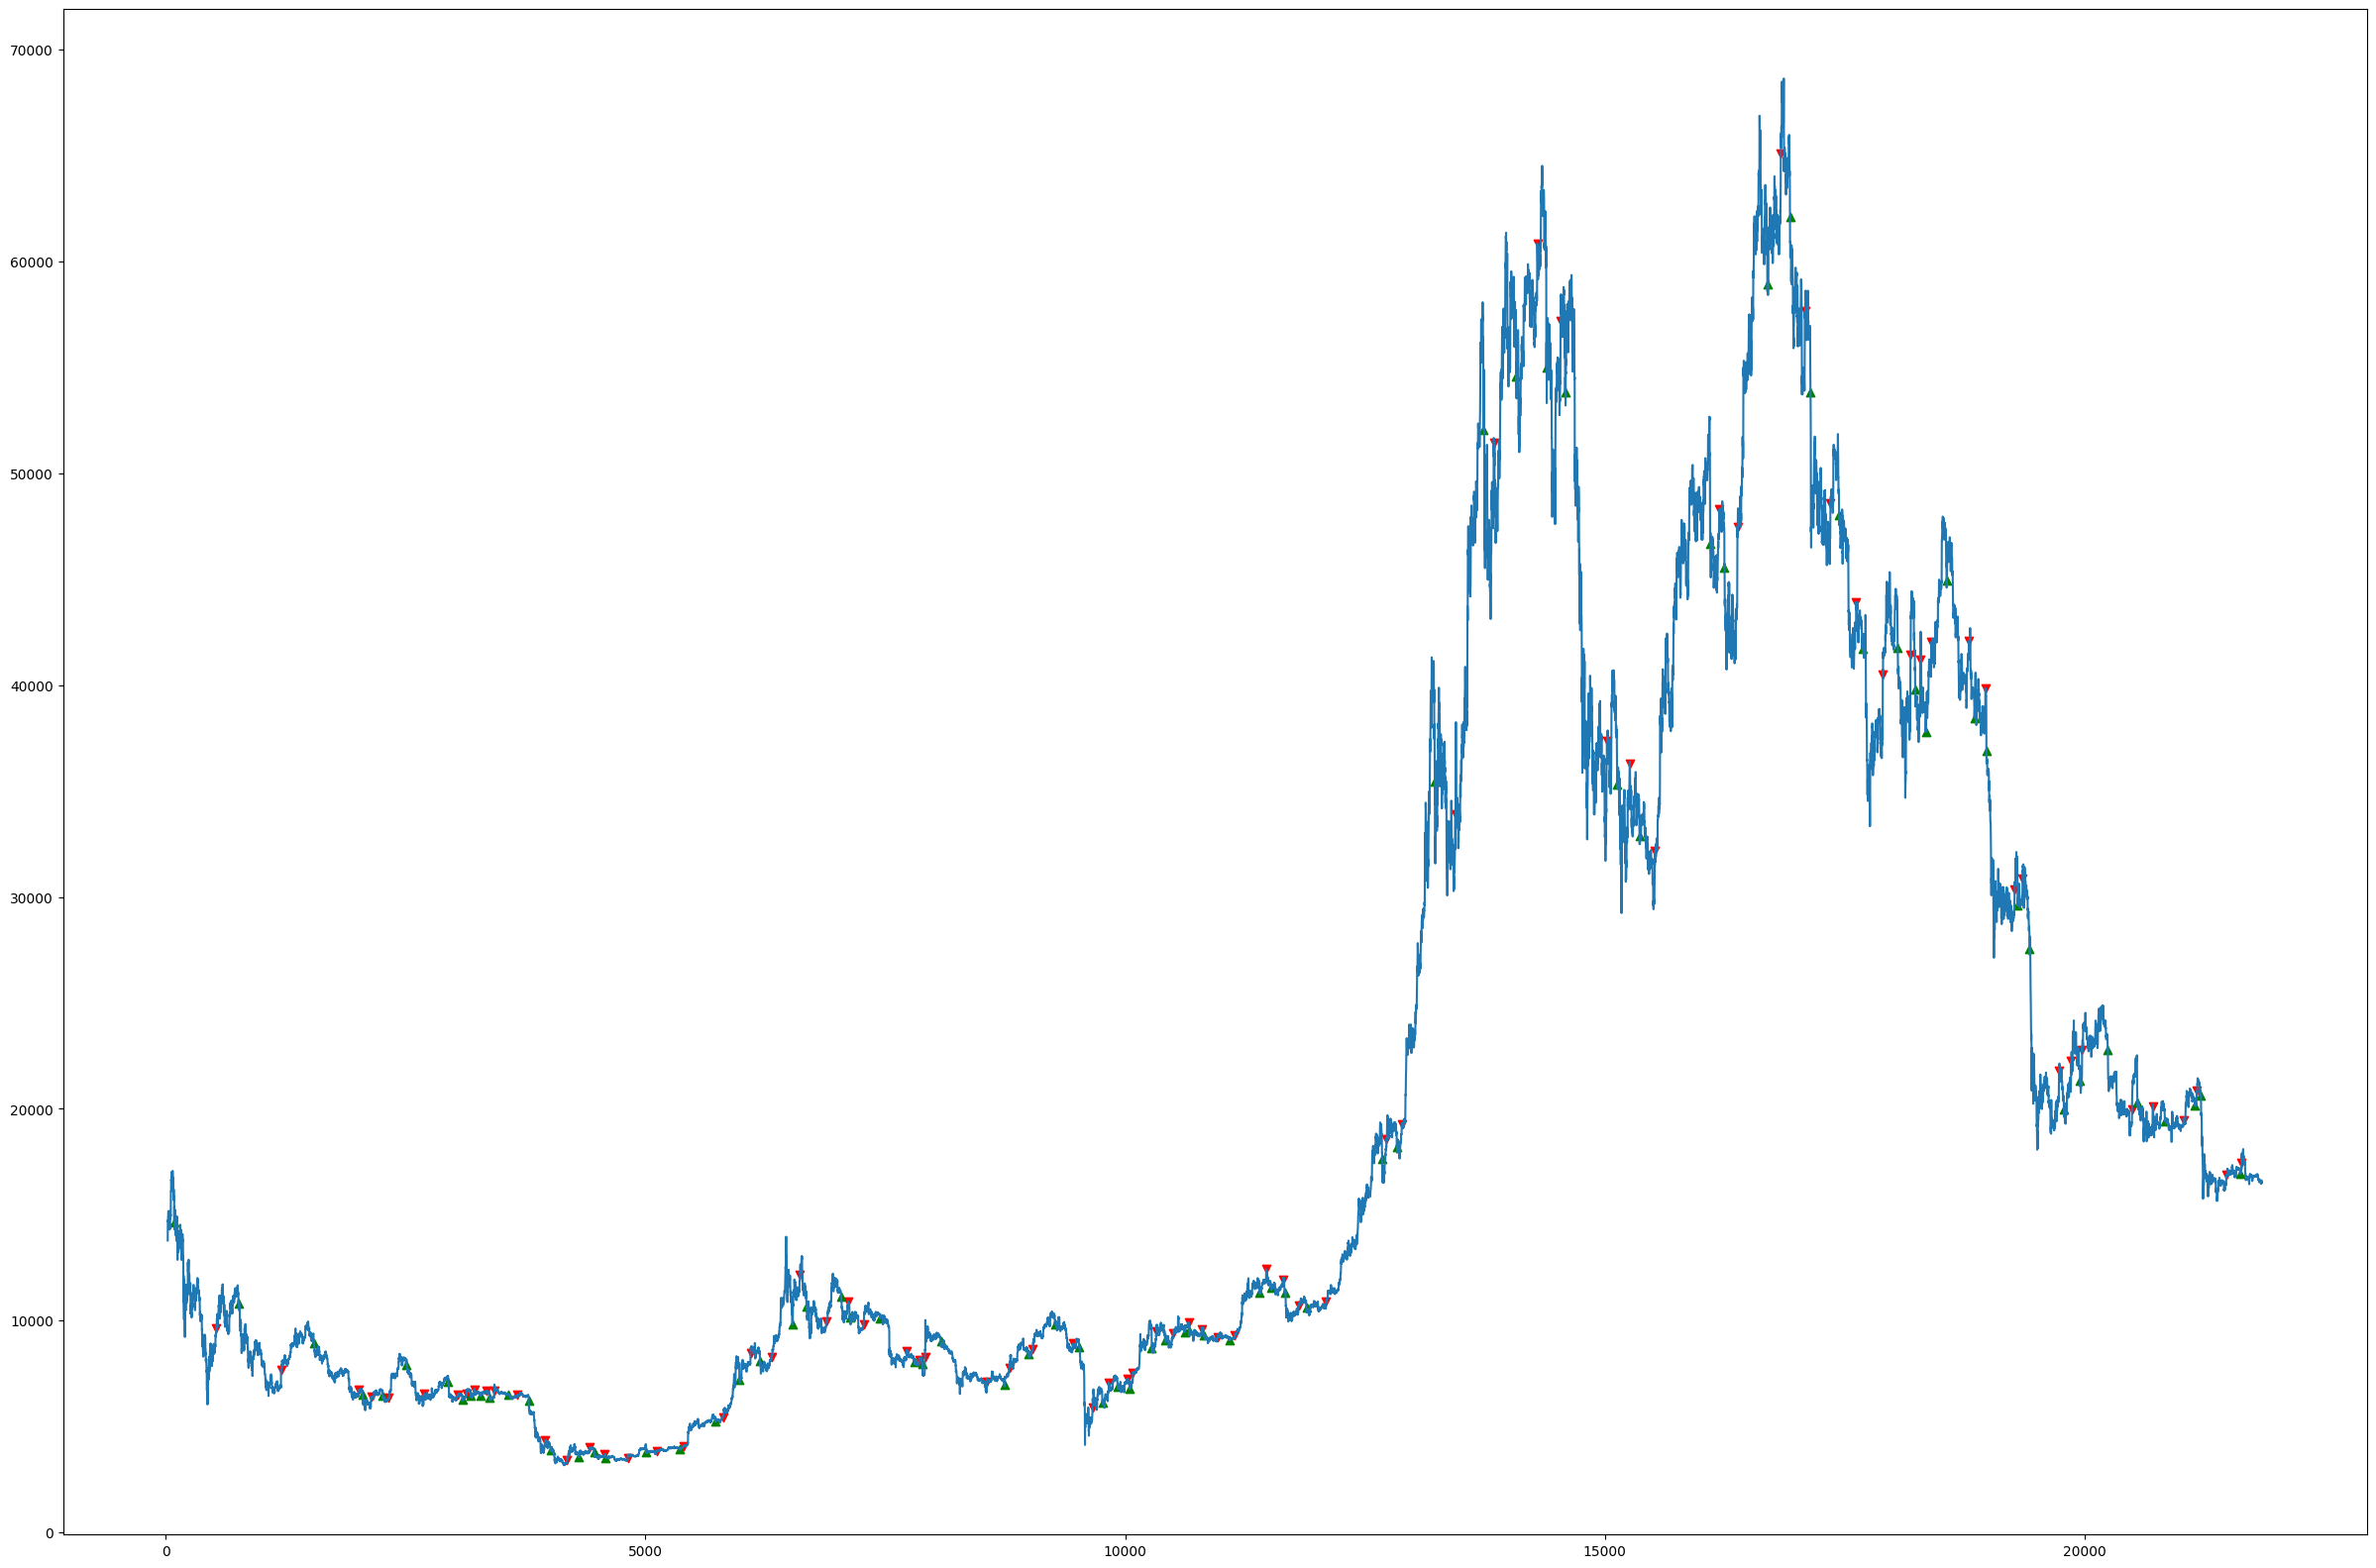

In [22]:
#test
df = '/Users/hipprofessional/Documents/Projects/Analysis of Technical Indicators (finance)/ZeptoLabs/btc_18_22_2h.csv'
BTC = MeanReversion(df)
BTC.cumulative_profit()